In [1]:
#1)Design model(input,output size,forward pass)
#2)Construct loss and optimizer
#3)Trainingtoop
# -forward pass:compute prediction and loss
# -backward pass: gradients
# - updateweights
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

In [2]:
#0) prepare data
X_numpy, Y_numpy =  datasets.make_regression(n_samples = 100, n_features = 1, noise = 20, random_state =1)

X = torch.from_numpy(X_numpy.astype(np.float32))
y = torch.from_numpy(Y_numpy.astype(np.float32))

y = y.view(y.shape[0], 1) #一行多列->一列多行


n_samples, n_features= X.shape
print(n_samples, n_features)

100 1


In [3]:
#1) model
input_size = n_features
output_size = 1
model = nn.Linear(input_size, output_size)

In [4]:
# 2) loss and optimize
lr = 0.01
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=lr)

epoch 1 loss = 342.20840454
epoch 11 loss = 339.62139893
epoch 21 loss = 337.72933960
epoch 31 loss = 336.34527588
epoch 41 loss = 335.33273315
epoch 51 loss = 334.59176636
epoch 61 loss = 334.04949951
epoch 71 loss = 333.65261841
epoch 81 loss = 333.36206055
epoch 91 loss = 333.14938354


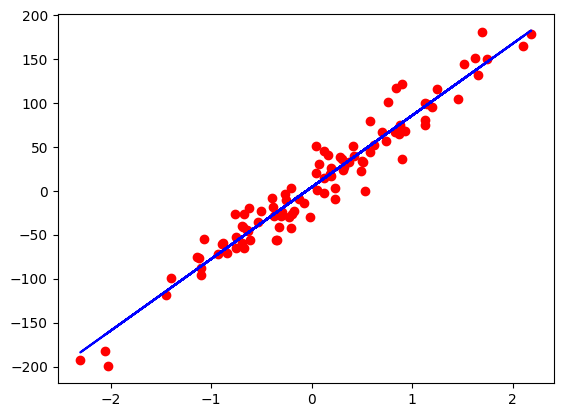

In [7]:
# training loop
num_epoch = 100
for epoch in range(num_epoch):
	# -forward pass:compute prediction and loss
	y_pred = model(X)
	loss = criterion(y_pred, y)
	# -backward pass: gradients
	loss.backward()
	# -updateweights
	optimizer.step()
	optimizer.zero_grad()
	
	# show loss
	if epoch%10==0:
		print(f'epoch {epoch+1} loss = {loss:.8f}')

#plot
predicted = model(X).detach().numpy()
plt.plot(X_numpy,Y_numpy,'ro')
plt.plot(X_numpy,predicted,'b')